In [1]:
import sys
repo_path = '/home/micael.verissimo/paper_lzt/exp-connection-hep/'
sys.path.insert(0, repo_path)

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
import mplhep as hep
plt.style.use(hep.style.ROOT)
import atlas_mpl_style as ampl
ampl.use_atlas_style()

In [3]:

elecron_df = pd.read_parquet(os.path.join(repo_path, 'data/processed/zee_mb.parquet'))
pion_df = pd.read_parquet(os.path.join(repo_path, 'data/processed/jf17_mb.parquet'))

m_df = pd.concat([elecron_df, pion_df], axis=0)

# Visualize the Rings

In [4]:
def norm1(data):
    norms = np.abs(data.sum(axis=1))
    norms[norms == 0] = 1
    return data / norms[:, None]

def plot_rings(data: pd.DataFrame, normalize: bool = True):
        
    rings = [f"cl_ring_{idx}" for idx in range(100)]
    fig, ax = plt.subplots(figsize=(15, 7))

    df1     = data.loc[data.target==1]
    df2     = data.loc[data.target==0]
    data1   = norm1(df1[rings].values.astype(np.float32)) if normalize else df1[rings].values.astype(np.float32)
    data2   = norm1(df2[rings].values.astype(np.float32)) if normalize else df2[rings].values.astype(np.float32)
    d1_mean = np.mean(data1, axis=0)
    d1_std  = np.std(data1 , axis=0)
    d2_mean = np.mean(data2, axis=0)
    d2_std  = np.std(data2 , axis=0)
    y_label = r'Energy [MeV]'

    n_rings     = [8, 64, 8, 8, 4, 4, 4]
    layer_names = ['PS', 'EM1', 'EM2', 'EM3', 'HAD1', 'HAD2', 'HAD3']
        
    # plot signal
    g1, = ax.plot(range(1, 101), d1_mean, color='dodgerblue', label=r'$Z\to ee$', marker='^')
    ax.fill_between(range(1, 101), d1_mean - d1_std, d1_mean + d1_std,
                        facecolor='dodgerblue', alpha=0.25)

    # plot signal
    g2, = ax.plot(range(1, 101), d2_mean, color='red', label='JF17', marker='v')
    ax.fill_between(range(1, 101), d2_mean - d2_std, d2_mean + d2_std,
                        facecolor='red', alpha=0.25)
        
    counter = 1
    for idx, (i_ring, i_layer) in enumerate(zip(n_rings, layer_names)):
        counter += i_ring
        if counter < 100:
            if i_layer=="PS":
                ax.axvline(x=counter, ymax=0.85, ls='--', lw=1.5, color='black')
            else:
                ax.axvline(x=counter, ls='--', lw=1.5, color='black')

        ax.text(counter - 2.5, y=d1_mean.max(), s=i_layer, rotation=90, fontsize=20)
        

    ymin, ymax = plt.gca().get_ylim()
    # set new ymax 
    ax.set_ylim([ymin, 1.4*ymax])
    # add a zoom into the profile
    ax2 = plt.axes([.35, .4, .3, .3])
    zoom_rings = ['L2Calo_ring_%i' %iring for iring in range(7, 7+64+1)]
    ax2.semilogy(range(8, 8+64+1), d1_mean[range(7, 7+64+1)], color='dodgerblue', label='electron', marker='^')
    ax2.semilogy(range(8, 8+64+1), d2_mean[range(7, 7+64+1)], color='red', label='jet', marker='v')
    counter = 1
    for idx, (i_ring, i_layer) in enumerate(zip([8, 64], ['PS', 'EM1'])):
        counter += i_ring
        if counter != 100:
            ax2.axvline(x=counter, ls='--', lw=1.5, color='black')
    ax2.set_xlabel("Ring Number")


    ax.legend(handles=[g1,g2], fontsize=20,ncol=2, loc=(0.15,-0.005))
    ax.set_ylabel(y_label)
    ax.set_xlabel('Ring number')
    ax.set_xlim([0, 103])
    ax.set_ylim([-0.2*d1_mean.max(),1.5*d1_mean.max()])

    hep.label.exp_text("Lorenzetti", r" Simulation, $E_T > 5 $ [GeV]", italic=(True, False, False),
                       ax=ax, loc=1, fontsize=20)
    ampl.set_ylabel(y_label)

    plt.savefig(os.path.join(repo_path, "notebooks/ring_shape.pdf"), facecolor='white')


In [5]:
print(list(m_df.columns))

['EventNumber', 'RunNumber', 'avgmu', 'cl_deta', 'cl_dphi', 'cl_e', 'cl_e0', 'cl_e1', 'cl_e2', 'cl_e233', 'cl_e237', 'cl_e277', 'cl_e2tsts1', 'cl_e3', 'cl_ehad1', 'cl_ehad2', 'cl_ehad3', 'cl_emaxs1', 'cl_emaxs2', 'cl_eratio', 'cl_et', 'cl_eta', 'cl_etot', 'cl_f0', 'cl_f1', 'cl_f2', 'cl_f3', 'cl_fracMax', 'cl_lambdaCenter', 'cl_lateralMom', 'cl_longitudinalMom', 'cl_phi', 'cl_reta', 'cl_rhad', 'cl_rhad1', 'cl_ring_0', 'cl_ring_1', 'cl_ring_10', 'cl_ring_11', 'cl_ring_12', 'cl_ring_13', 'cl_ring_14', 'cl_ring_15', 'cl_ring_16', 'cl_ring_17', 'cl_ring_18', 'cl_ring_19', 'cl_ring_2', 'cl_ring_20', 'cl_ring_21', 'cl_ring_22', 'cl_ring_23', 'cl_ring_24', 'cl_ring_25', 'cl_ring_26', 'cl_ring_27', 'cl_ring_28', 'cl_ring_29', 'cl_ring_3', 'cl_ring_30', 'cl_ring_31', 'cl_ring_32', 'cl_ring_33', 'cl_ring_34', 'cl_ring_35', 'cl_ring_36', 'cl_ring_37', 'cl_ring_38', 'cl_ring_39', 'cl_ring_4', 'cl_ring_40', 'cl_ring_41', 'cl_ring_42', 'cl_ring_43', 'cl_ring_44', 'cl_ring_45', 'cl_ring_46', 'cl_ring_

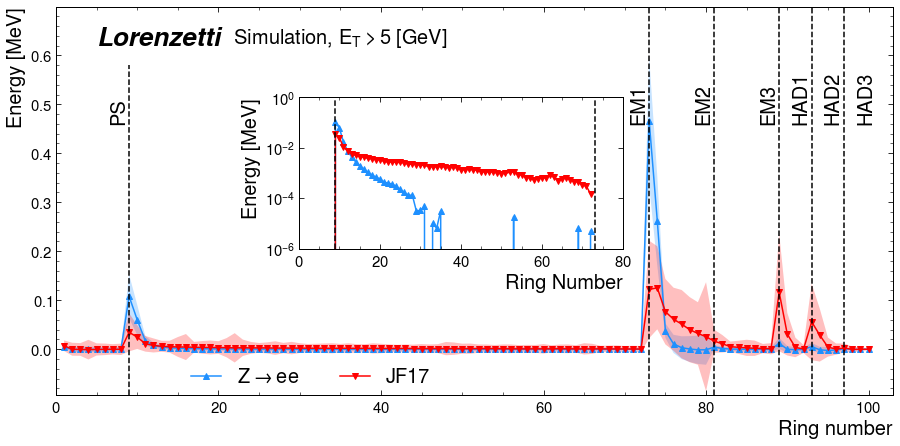

In [6]:
plot_rings(m_df)
plt.show()

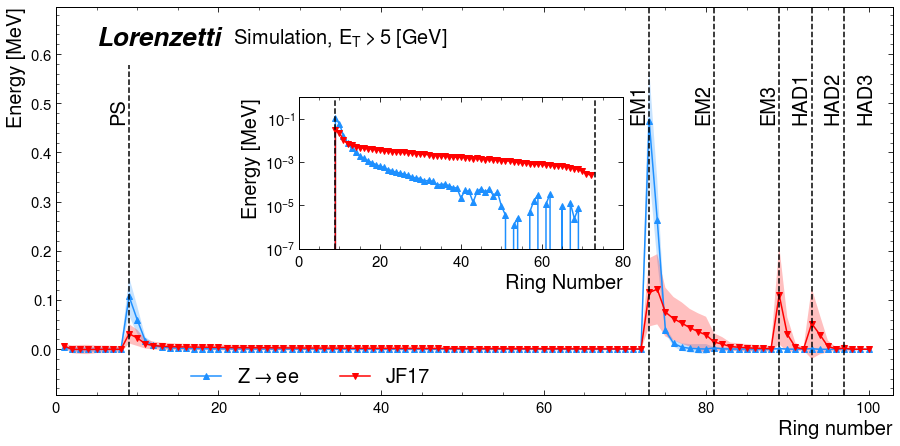

In [7]:
plot_rings(m_df)
plt.show()